# **Set up**

*This* project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

**It** also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**And** TensorFlow ≥ 2.8:

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Regression MLPs (Multi-Layer Perceptron)

In [5]:
# Import necessary libraries and modules
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Create an MLPRegressor with 3 hidden layers, each containing 50 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create a StandardScaler for feature scaling
scaler = StandardScaler()

# Create a pipeline that first scales the features using StandardScaler
# and then applies the MLPRegressor
pipeline = make_pipeline(scaler, mlp_reg)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE) between the predicted and actual values
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Display the RMSE as the result
print(rmse)


0.5053326657968679


# Implementing MLPs with Keras


In [7]:
# Import necessary libraries and modules
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Load the California housing dataset
housing = fetch_california_housing()

**Dataset Insights**

In [ ]:
print(housing.DESCR)

In [11]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [9]:
# Standardize the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Build the Keras model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(50, activation='relu'),      # Hidden layer with 50 neurons and ReLU activation
    layers.Dense(50, activation='relu'),      # Another hidden layer with 50 neurons and ReLU activation
    layers.Dense(1)                            # Output layer (1 neuron for regression)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


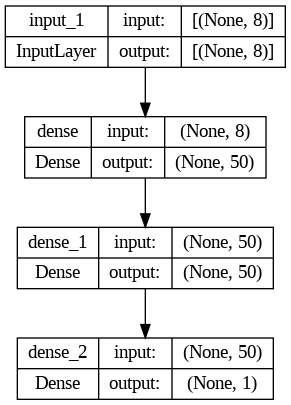

In [12]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_california_housing_prediction_model.png", show_shapes=True)

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Train the model on the scaled training data
model_history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid))


Epoch 1/50
363/363 [==============================] - 4s 6ms/step - loss: 0.9129 - val_loss: 1.0555
Epoch 2/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4160 - val_loss: 1.3975
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3800 - val_loss: 0.3416
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3542 - val_loss: 1.3071
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3606 - val_loss: 0.4833
Epoch 6/50
363/363 [==============================] - 3s 7ms/step - loss: 0.3475 - val_loss: 1.1885
Epoch 7/50
363/363 [==============================] - 3s 8ms/step - loss: 0.3454 - val_loss: 1.6495
Epoch 8/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3359 - val_loss: 4.1079
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3386 - val_loss: 1.8836
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3227 - val_loss: 2.5631

In [15]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 363}

In [16]:
print(model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(model_history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [18]:
# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error on Test Set:", rmse)

162/162 [==============================] - 0s 1ms/step - loss: 0.2862
Root Mean Squared Error on Test Set: 0.5349545342297871
